In [42]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from pandas import DataFrame,Series

In [43]:
print(dir(DataFrame.plot))

['__annotations__', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_accessors', '_all_kinds', '_common_kinds', '_constructor', '_dataframe_kinds', '_dir_additions', '_dir_deletions', '_get_call_args', '_hidden_attrs', '_kind_aliases', '_reset_cache', '_series_kinds', 'area', 'bar', 'barh', 'box', 'density', 'hexbin', 'hist', 'kde', 'line', 'pie', 'scatter']


In [44]:
print(dir(Series.plot))

['__annotations__', '__call__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_accessors', '_all_kinds', '_common_kinds', '_constructor', '_dataframe_kinds', '_dir_additions', '_dir_deletions', '_get_call_args', '_hidden_attrs', '_kind_aliases', '_reset_cache', '_series_kinds', 'area', 'bar', 'barh', 'box', 'density', 'hexbin', 'hist', 'kde', 'line', 'pie', 'scatter']


<AxesSubplot:>

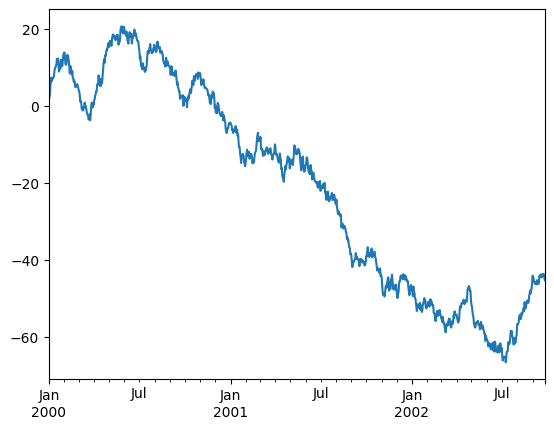

In [45]:
np.random.seed(0)#使得每次生成的随机数相同
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts1 = ts.cumsum()#累加
ts1.plot(kind="line")#默认绘制折线图

<AxesSubplot:>

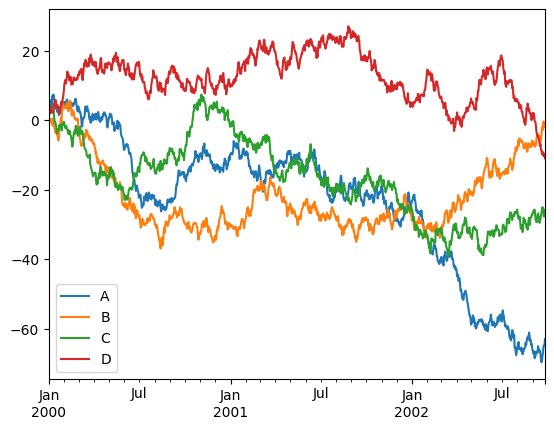

In [46]:
np.random.seed(0)
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))
df = df.cumsum()
df.plot()#默认绘制折线图

<AxesSubplot:>

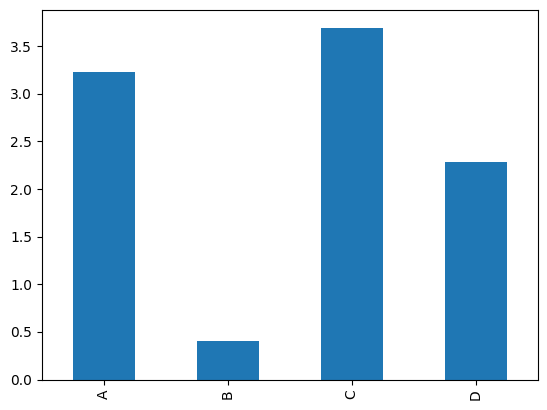

In [47]:
df.iloc[5].plot(kind="bar")

<AxesSubplot:>

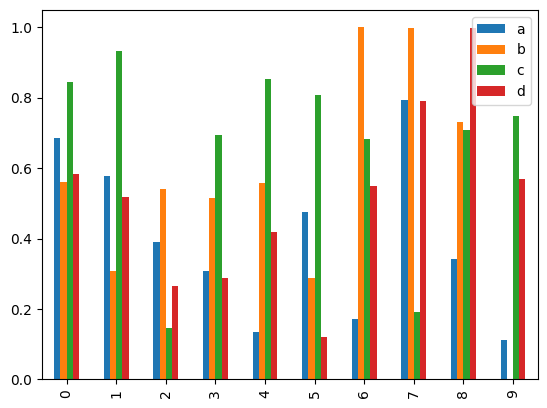

In [48]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])
df2.plot.bar()

<AxesSubplot:>

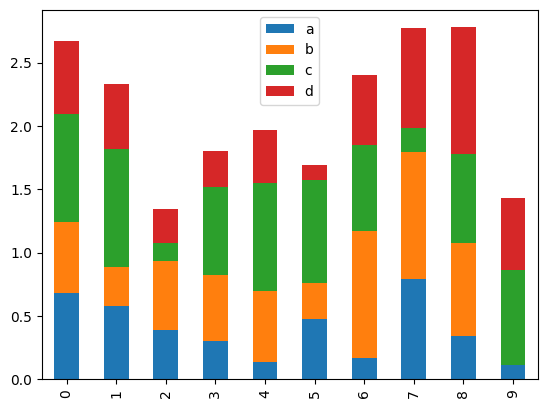

In [49]:
df2.plot.bar(stacked=True)

<AxesSubplot:>

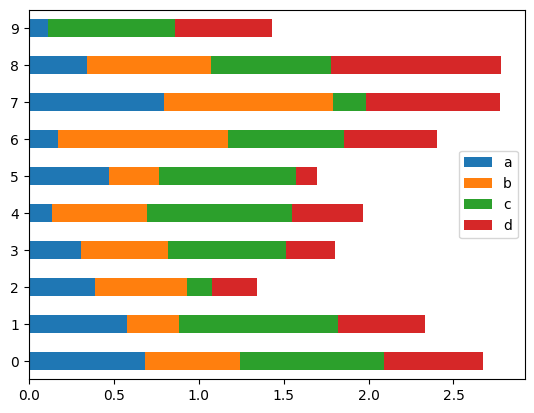

In [50]:
df2.plot.barh(stacked=True)

<AxesSubplot:ylabel='Frequency'>

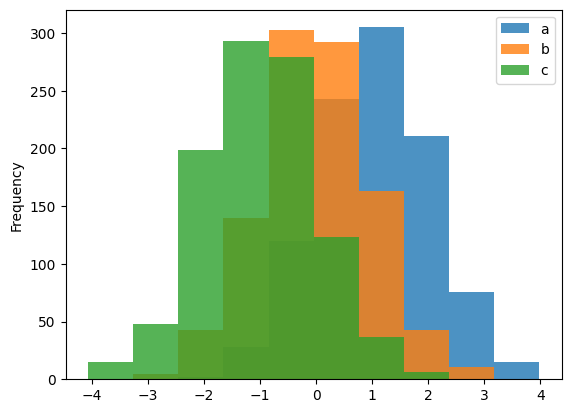

In [51]:
df4 = pd.DataFrame(
    {
        "a": np.random.randn(1000) + 1,
        "b": np.random.randn(1000),
        "c": np.random.randn(1000) - 1,
    },
    columns=["a", "b", "c"],
)
df4.plot.hist(alpha=0.8)

array([[<AxesSubplot:title={'center':'A'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'C'}>,
        <AxesSubplot:title={'center':'D'}>]], dtype=object)

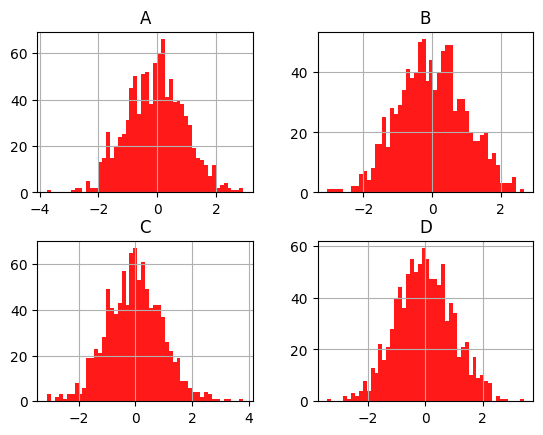

In [52]:
df.diff().hist(color="r", alpha=0.9, bins=50)

<AxesSubplot:>

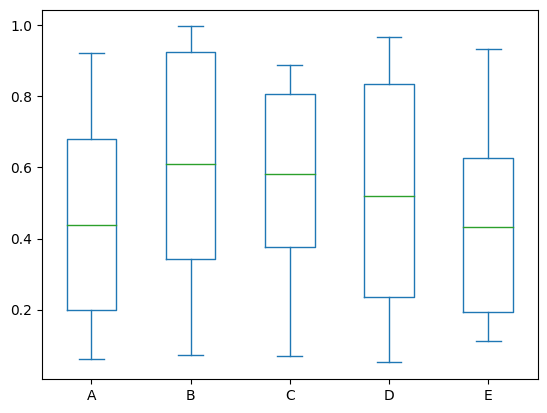

In [53]:
df = pd.DataFrame(np.random.rand(10, 5), columns=["A", "B", "C", "D", "E"])
df.plot.box()

<AxesSubplot:>

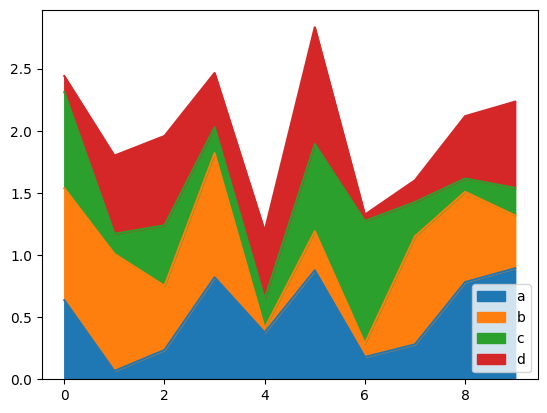

In [54]:
df = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])
df.plot.area()

<AxesSubplot:>

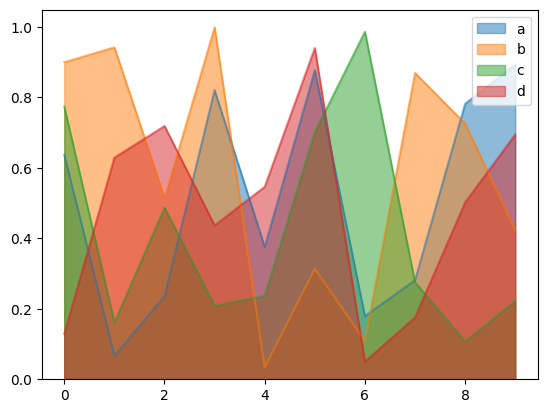

In [55]:
df.plot.area(stacked=False)

<AxesSubplot:xlabel='c', ylabel='d'>

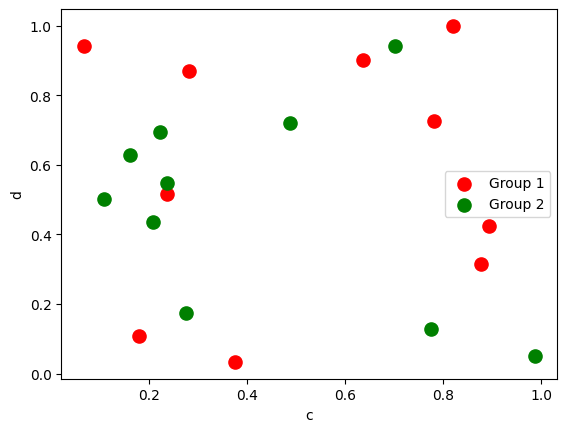

In [56]:
ax = df.plot.scatter(x="a", y="b", color="r", label="Group 1",s=90)
df.plot.scatter(x="c", y="d", color="g", label="Group 2", ax=ax,s=90)

<AxesSubplot:ylabel='series'>

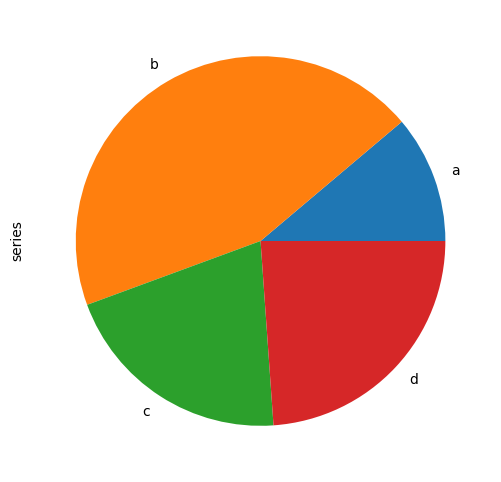

In [57]:
series = pd.Series(3 * np.random.rand(4), index=["a", "b", "c", "d"], name="series")
series.plot.pie(figsize=(6, 6))

array([<AxesSubplot:ylabel='x'>, <AxesSubplot:ylabel='y'>], dtype=object)

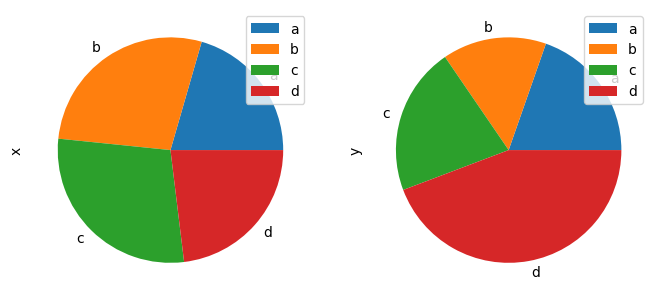

In [58]:
df = pd.DataFrame(
    3 * np.random.rand(4, 2), index=["a", "b", "c", "d"], columns=["x", "y"]
)
df.plot.pie(subplots=True, figsize=(8, 4))

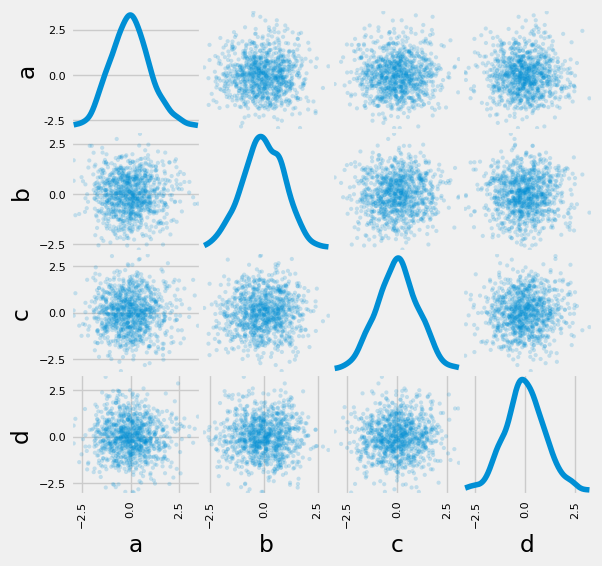

In [59]:
import matplotlib as mpl
mpl.rc_file_defaults()
plt.style.use('fivethirtyeight')
from pandas.plotting import scatter_matrix
df = pd.DataFrame(np.random.randn(1000, 4), columns=["a", "b", "c", "d"])
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal="kde")
plt.show()

<AxesSubplot:xlabel='a', ylabel='b'>

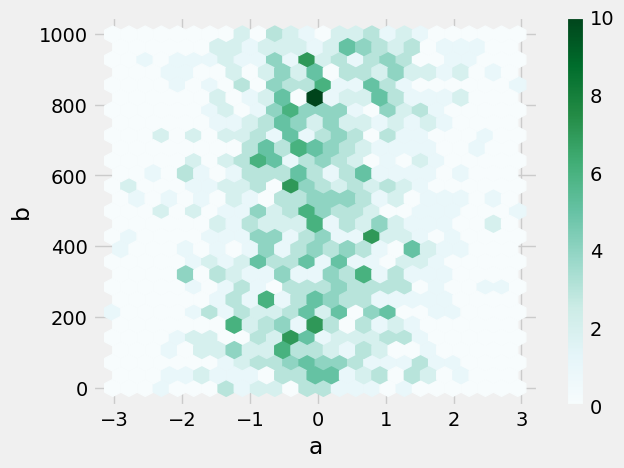

In [60]:
df = pd.DataFrame(np.random.randn(1000, 2), columns=["a", "b"])
df["b"] = df["b"] + np.arange(1000)
df.plot.hexbin(x="a", y="b", gridsize=25)

<AxesSubplot:>

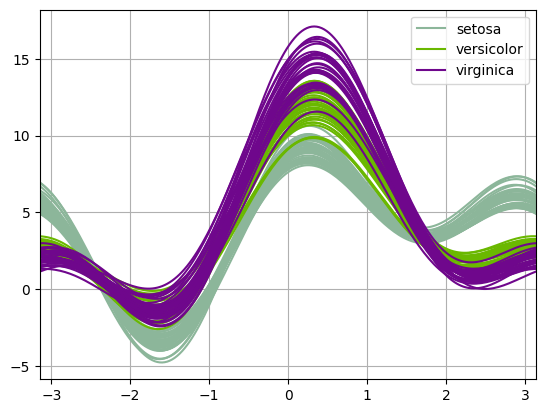

In [71]:
from pandas.plotting import andrews_curves
mpl.rc_file_defaults()
data = pd.read_csv("iris.data.txt")
# plt.style.use('dark_background')
andrews_curves(data, "Species")

<AxesSubplot:ylabel='Density'>

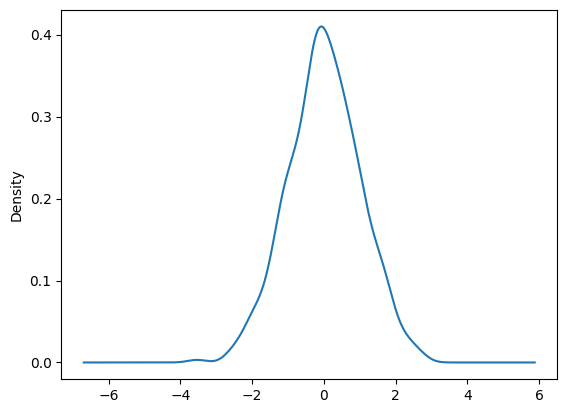

In [72]:
ser = pd.Series(np.random.randn(1000))
ser.plot.kde()

<AxesSubplot:>

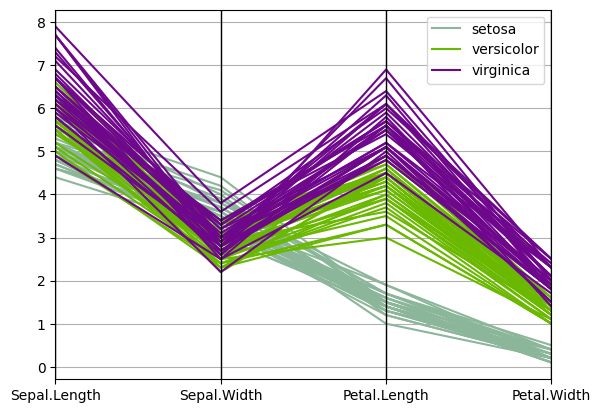

In [79]:
from pandas.plotting import parallel_coordinates
data = pd.read_csv("iris.data.txt")
plt.figure()
parallel_coordinates(data, "Species")

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

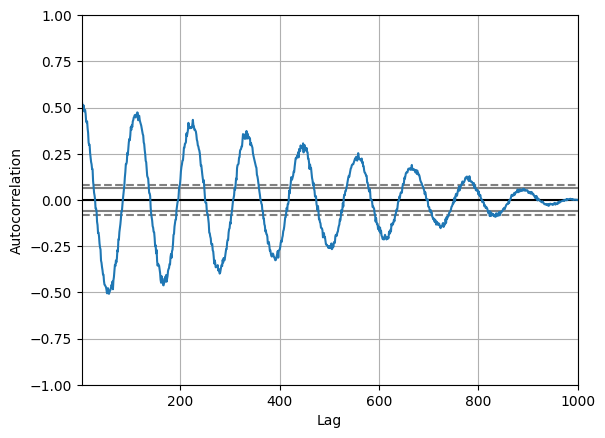

In [73]:
from pandas.plotting import autocorrelation_plot
plt.figure();
spacing = np.linspace(-9 * np.pi, 9 * np.pi, num=1000)
data = pd.Series(0.7 * np.random.rand(1000) + 0.3 * np.sin(spacing))
autocorrelation_plot(data)

<AxesSubplot:>

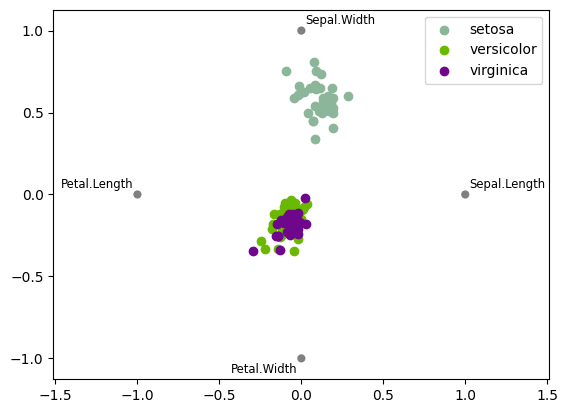

In [74]:
from pandas.plotting import radviz
data = pd.read_csv("iris.data.txt")
plt.figure()
radviz(data, "Species")

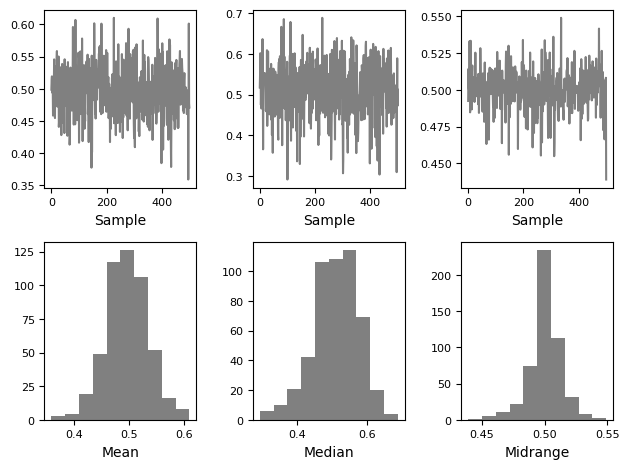

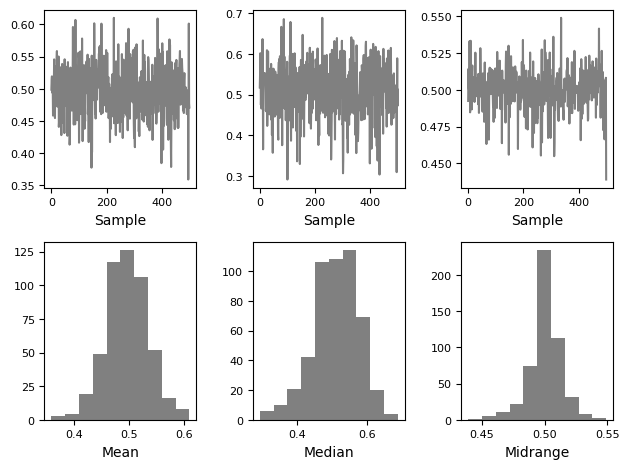

In [75]:
from pandas.plotting import bootstrap_plot
data = pd.Series(np.random.rand(1000))
bootstrap_plot(data, size=50, samples=500, color="grey")

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

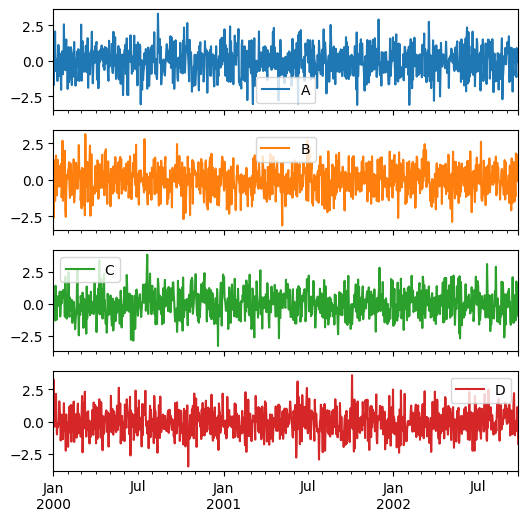

In [76]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))
df.plot(subplots=True, figsize=(6, 6))

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

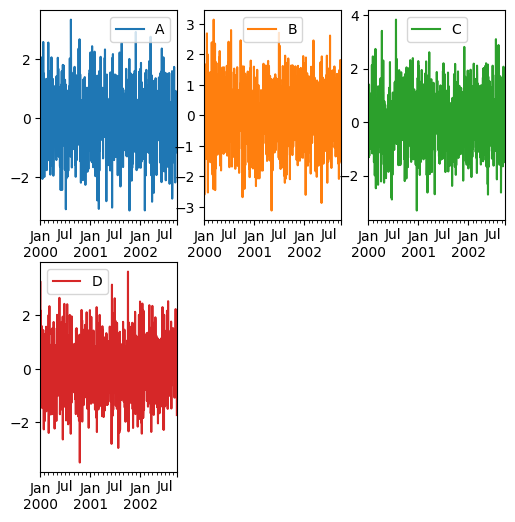

In [77]:
df.plot(subplots=True, layout=(2, 3), figsize=(6, 6), sharex=False)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

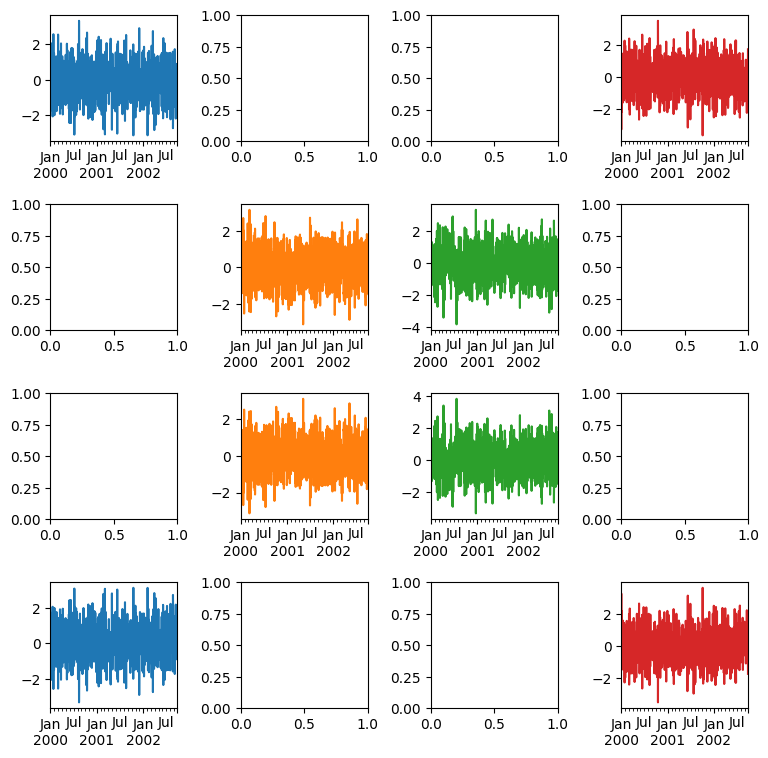

In [78]:
fig, axes = plt.subplots(4, 4, figsize=(9, 9))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
target1 = [axes[0][0], axes[1][1], axes[2][2], axes[3][3]]
target2 = [axes[3][0], axes[2][1], axes[1][2], axes[0][3]]
df.plot(subplots=True, ax=target1, legend=False, sharex=False, sharey=False);
(-df).plot(subplots=True, ax=target2, legend=False, sharex=False, sharey=False)

In [69]:
df.describe()

,A,B,C,D
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.001615,0.074166,-0.040215,0.052236
std,0.986493,1.018534,0.993478,0.955713
min,-4.446632,-3.432215,-3.007413,-3.169979
25%,-0.675374,-0.563148,-0.719295,-0.572976
50%,-0.016723,0.089645,-0.054637,0.083864
75%,0.676492,0.753173,0.667048,0.654958
max,3.200688,3.468383,3.598310,3.321601


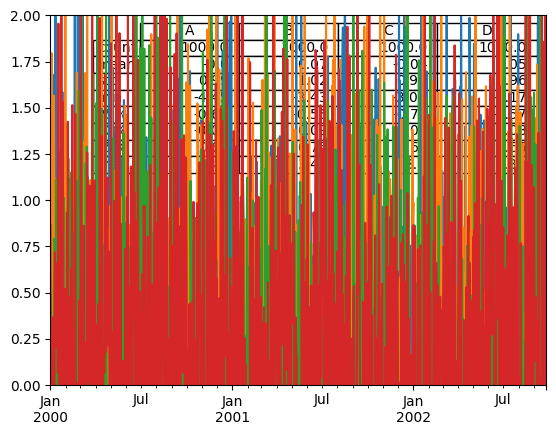

In [70]:
from pandas.plotting import table
mpl.rc_file_defaults()
#plt.style.use('dark_background')
fig, ax = plt.subplots(1, 1)
table(ax, np.round(df.describe(), 2), loc="upper right", colWidths=[0.2, 0.2, 0.2, 0.2]);
df.plot(ax=ax, ylim=(0, 2), legend=None);